In [14]:
import torch
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import random
import cv2
from PIL import Image
import os
import func

In [2]:
transform = transforms.Compose(
    [transforms.Resize([224,224]),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.ImageFolder('./Dataset_OpenCvDl_Hw2_Q5/training_dataset',transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder('./Dataset_OpenCvDl_Hw2_Q5/validation_dataset', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)

classes = ('Cat', 'Dog')

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
model = models.resnet50(pretrained=False)
model.fc = nn.Sequential(nn.Linear(2048,1),nn.Sigmoid())
model.to(device)

d:\anaconda3\envs\opencvdl\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
d:\anaconda3\envs\opencvdl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# summary(model, (3,224,224))

In [6]:
criterion1 = torch.nn.functional.binary_cross_entropy
optimizer = optim.Adam(model.parameters())

In [7]:
loss_history1= []
train_acc1 = []
test_acc1 = []

In [ ]:
# print(loss_history,train_acc,test_acc)

In [9]:
## loss binary
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = torch.squeeze(model(inputs),1)
        
        loss = criterion1(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    loss_history1.append(running_loss / 2000)    
    print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
    running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            predicted,_ = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += ((predicted > 0.5)== labels).sum().item()

    print('Accuracy of the  modelwork on the 2000 test images: %d %%' % (
        100 * correct / total))
    test_acc1.append(correct / total) 
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            predicted,_ = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += ((predicted > 0.5)== labels).sum().item()

    print('Accuracy of the  modelwork on the 20000 train images: %d %%' % (
        100 * correct / total))
    train_acc1.append(correct / total) 

print('Finished Training')

[1,  1013] loss: 0.055
Accuracy of the  modelwork on the 2000 test images: 82 %
Accuracy of the  modelwork on the 20000 train images: 96 %
[2,  1013] loss: 0.053
Accuracy of the  modelwork on the 2000 test images: 81 %
Accuracy of the  modelwork on the 20000 train images: 96 %
[3,  1013] loss: 0.048
Accuracy of the  modelwork on the 2000 test images: 81 %
Accuracy of the  modelwork on the 20000 train images: 97 %
[4,  1013] loss: 0.042
Accuracy of the  modelwork on the 2000 test images: 82 %
Accuracy of the  modelwork on the 20000 train images: 98 %
[5,  1013] loss: 0.038
Accuracy of the  modelwork on the 2000 test images: 83 %
Accuracy of the  modelwork on the 20000 train images: 97 %
[6,  1013] loss: 0.036
Accuracy of the  modelwork on the 2000 test images: 83 %
Accuracy of the  modelwork on the 20000 train images: 97 %
[7,  1013] loss: 0.036
Accuracy of the  modelwork on the 2000 test images: 81 %
Accuracy of the  modelwork on the 20000 train images: 95 %
[8,  1013] loss: 0.028
Accu

In [10]:
PATH = './resnet_model_BCE.pth'
torch.save(model.state_dict(), PATH)

In [11]:
print(len(test_acc1))

40


In [12]:
model1 = models.resnet50(pretrained=False)
model1.fc = nn.Sequential(nn.Linear(2048,1),nn.Sigmoid())
model1.to(device)

d:\anaconda3\envs\opencvdl\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
d:\anaconda3\envs\opencvdl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
criterion2 = func.FocalLoss(alpha=0.3)
optimizer = optim.Adam(model1.parameters())

In [26]:
loss_history2= []
train_acc2 = []
test_acc2 = []

In [25]:
print(len(test_acc2))

0


In [27]:
## loss FC
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = torch.squeeze(model1(inputs),1)
        
        loss = criterion2(outputs, labels.float())
        loss = loss.sum()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    loss_history2.append(running_loss / 2000)    
    print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
    running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model1(images)
            predicted,_ = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += ((predicted>0.5) == labels).sum().item()

    print('Accuracy of test images: %d %%' % (
        100 * correct / total))
    test_acc2.append(correct / total) 
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model1(images)
            predicted,_ = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += ((predicted>0.5) ==labels).sum().item()

    print('Accuracy of  train images: %d %%' % (
        100 * correct / total))
    train_acc2.append(correct / total) 

print('Finished Training')

[1,  1013] loss: 0.021
Accuracy of test images: 66 %
Accuracy of  train images: 66 %
[2,  1013] loss: 0.018
Accuracy of test images: 61 %
Accuracy of  train images: 70 %
[3,  1013] loss: 0.016
Accuracy of test images: 60 %
Accuracy of  train images: 71 %
[4,  1013] loss: 0.014
Accuracy of test images: 56 %
Accuracy of  train images: 75 %
[5,  1013] loss: 0.012
Accuracy of test images: 60 %
Accuracy of  train images: 76 %
[6,  1013] loss: 0.010
Accuracy of test images: 58 %
Accuracy of  train images: 79 %
[7,  1013] loss: 0.009
Accuracy of test images: 62 %
Accuracy of  train images: 84 %
[8,  1013] loss: 0.007
Accuracy of test images: 59 %
Accuracy of  train images: 83 %
[9,  1013] loss: 0.005
Accuracy of test images: 63 %
Accuracy of  train images: 87 %
[10,  1013] loss: 0.004
Accuracy of test images: 65 %
Accuracy of  train images: 87 %
[11,  1013] loss: 0.004
Accuracy of test images: 64 %
Accuracy of  train images: 88 %
[12,  1013] loss: 0.003
Accuracy of test images: 66 %
Accuracy 

In [28]:
PATH = './resnet_model_FC.pth'
torch.save(model1.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


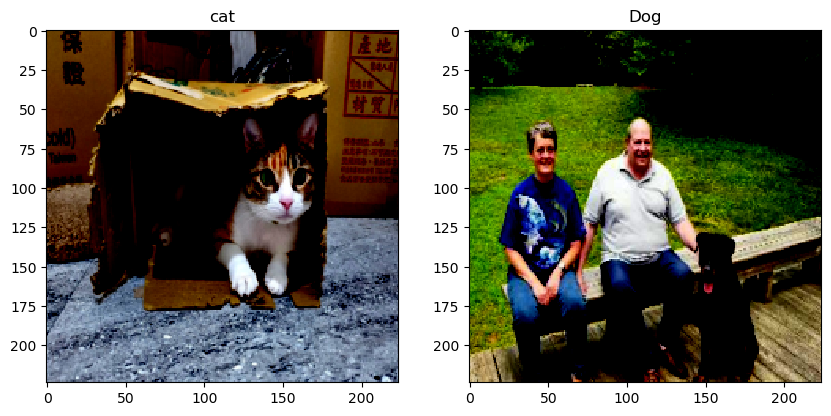

In [29]:
# Img show
infernceset = torchvision.datasets.ImageFolder('./Dataset_OpenCvDl_Hw2_Q5/inference_dataset',transform=transform)
a = random.randint(1,4)
b = random.randint(5,8)
plt.figure(num='Figur 1',figsize=(10,10))
plt.subplot(1,2,1)
plt.title('cat')
plt.imshow(infernceset[a][0].permute(1,2,0))
plt.subplot(1,2,2)
plt.title('Dog')
plt.imshow(infernceset[b][0].permute(1,2,0))
plt.show()

5412
10788


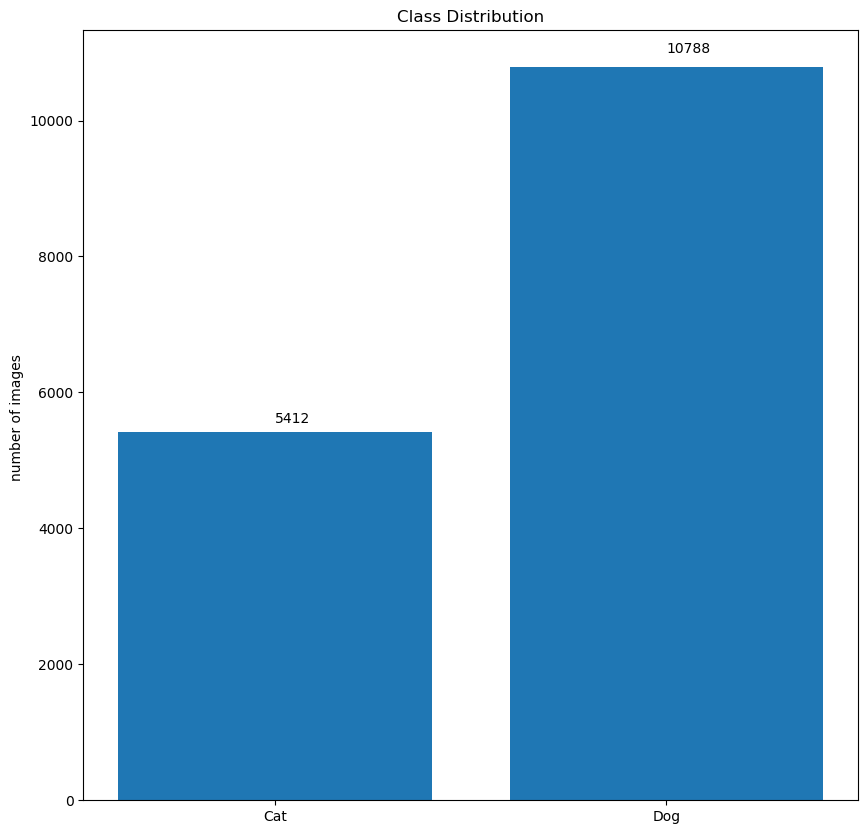

In [33]:
# distribution
cat_count = 0
dir = './Dataset_OpenCvDl_Hw2_Q5/training_dataset/Cat'
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        cat_count  += 1
print(cat_count)

dog_count = 0
dir = './Dataset_OpenCvDl_Hw2_Q5/training_dataset/Dog'
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        dog_count += 1
print(dog_count)

plt.figure(num='Figur 1',figsize=(10,10))
x = [1,2] 
h =[cat_count,dog_count]
label = ['Cat','Dog']
plt.title('Class Distribution')
plt.ylabel("number of images ") # y label
plt.xticks(x,label)
plt.text(1,5555,str(cat_count))
plt.text(2,10999,str(dog_count))
plt.bar(x,h)
plt.show()

0.85
0.815


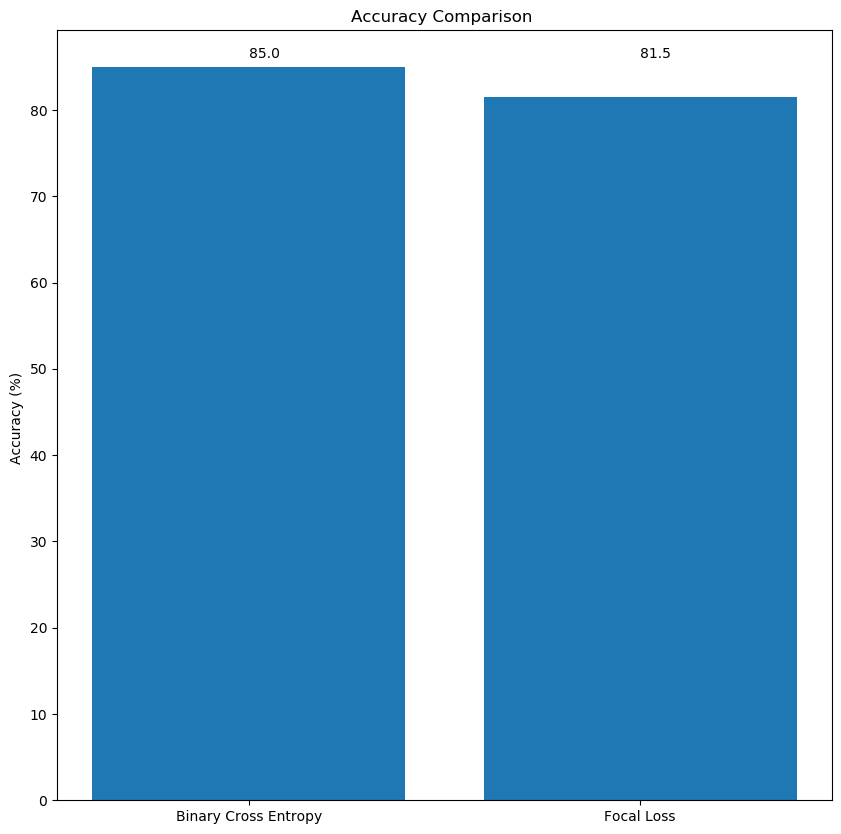

In [58]:
print(test_acc1[39])
print(test_acc2[39])

plt.figure(num='Figur 1',figsize=(10,10))
x = [1,2] 
h =[test_acc1[39]*100,test_acc2[39]*100]
label = ["Binary Cross Entropy","Focal Loss"]
plt.title('Accuracy Comparison ')
plt.ylabel("Accuracy (%) ") # y label
plt.xticks(x,label)
plt.text(1,86,str(h[0]))
plt.text(2,86,str(h[1]))
plt.bar(x,h)
plt.show()